In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-dimreduce-hello)

We make an image from some text, then reload it as a matrix.

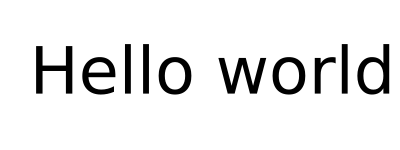

In [2]:
using Images
plot(annotations=(0.5, 0.5, text("Hello world", 44, :center, :center)),
    grid=:none, frame=:none, size=(400, 150))
savefig("hello.png")
img = load("hello.png")
A = @. Float64(Gray(img))
Gray.(A)

Next we show that the singular values decrease until they reach zero (more precisely, until they are about $\epsilon_\text{mach}$ times the norm of the matrix) at around $k=45$.

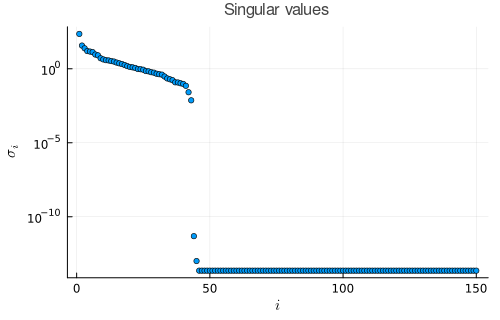

In [3]:
U, σ, V = svd(A)
scatter(σ;
    xaxis=(L"i"),  yaxis=(:log10, L"\sigma_i"),
    title="Singular values")

The rapid decrease suggests that we can get fairly good low-rank approximations.

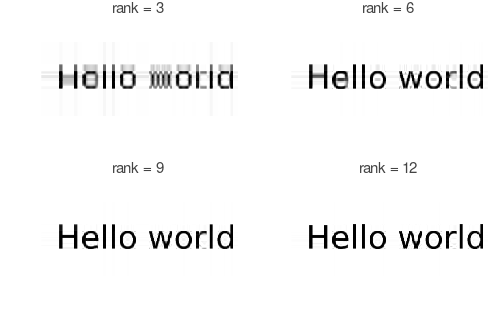

In [4]:
plt = plot(layout=(2, 2), frame=:none, aspect_ratio=1, titlefontsize=10)
for i in 1:4
    k = 3i
    Ak = U[:, 1:k] * diagm(σ[1:k]) * V[:, 1:k]'
    plot!(Gray.(Ak), subplot=i, title="rank = $k")
end
plt

Consider how little data is needed to reconstruct these images. For rank-9, for instance, we have 9 left and right singular vectors plus 9 singular values, for a compression ratio of better than 12:1.

In [5]:
m, n = size(A)
compression = m * n / (9 * (m + n + 1))

12.099213551119178